In [0]:

import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt
import scipy.stats as stats


$\frac{dX_m}{dt} = V_RR - V_BB\frac{X_m}{K+X_m}$

In [0]:
K = 1
vbb0 = 2
vrr0 = 1
vrr = 1

t = np.linspace(0,1100,10000)
def attractant(t):
  return np.sin(t/20/np.pi)/2+0.5

def attractant(t):
  if t < 500:
    return 0.1 + t/1000
  if t < 1000:
    return 1.1 - t/1000
  return 0.1

def attractant(t):
  return scipy.stats.norm.pdf(t, loc=500, scale=50)  

initial_ss = K*vrr/(vbb0-vrr)
initial_conc = [initial_ss]

In [0]:
def che_finetuned(conc, t, attfn, vrr, vrr0, vbb0, K):
  x = conc[0]
  vbb = ((1-attfn(t))/(1-attfn(0)))*(vbb0-vrr0)+ vrr0
  return [vrr - vbb*x/(K+x)]
 

In [0]:
xm = sci.odeint(che_finetuned, initial_conc, t, (attractant, vrr, 
                                                 vrr0, vbb0, K))

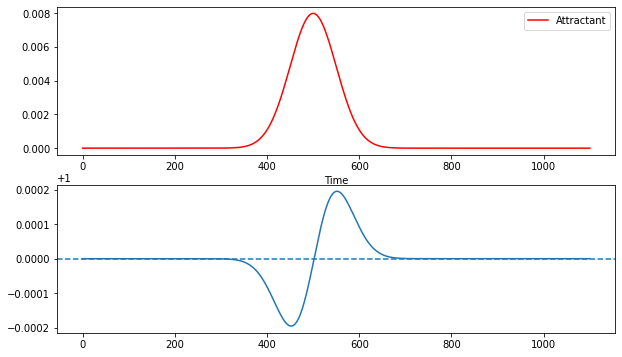

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(212)
receptor_activity = [1-attractant(i) for i in t]
attractant_levels = [attractant(i) for i in t]

plt.plot(t,(receptor_activity*xm.T).T, label="Tumbling Activity")
ax.axhline(y=(receptor_activity[0])*initial_ss, linestyle="dashed")

ax = fig.add_subplot(211)
plt.plot(t,attractant_levels, 'r',label="Attractant")

ax.set_xlabel("Time")
#ax.set_yscale("log")
#ax.set_ylabel("Tumbling Activity")
ax.legend()

In [0]:
def che_barkaileiber(conc, t, attfn, vrr, vbb0, K):
  x = conc[0]
  return [vrr - vbb0*(x*(1-attfn(t)))/(K+(x*(1-attfn(t))))]
   

Text(0, 0.5, 'Tumbling Activity')

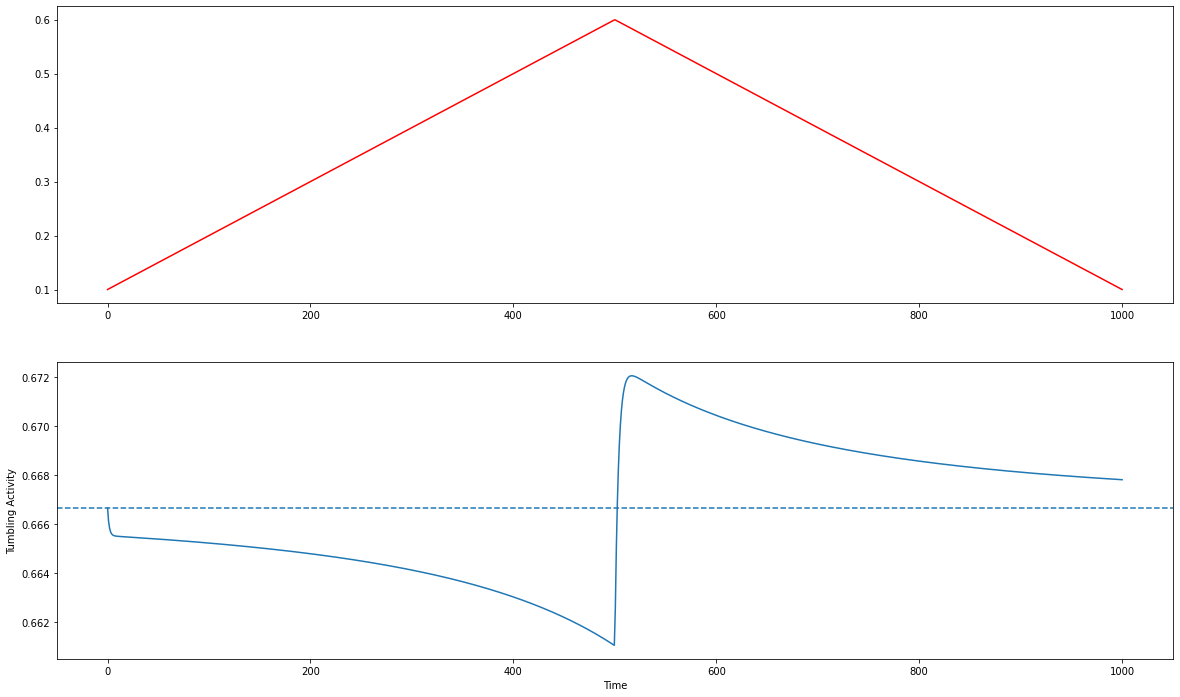

In [0]:
vrr = 0.8
initial_ss = K/(1-attractant(0))*vrr/(vbb0-vrr)
initial_conc = [initial_ss]
t = np.linspace(0,1000,1000)

xm = sci.odeint(che_barkaileiber, initial_conc, t, (attractant, 
                                                    vrr, vbb0, K))
receptor_activity = [1-attractant(i) for i in t]
attractant_levels = [attractant(i) for i in t]
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot(211)
plt.plot(t,attractant_levels, 'r',label="Attractant")

ax = fig.add_subplot(212)
plt.plot(t,(receptor_activity*xm.T).T, label="Tumbling Activity")
ax.axhline(y=initial_ss*(1-attractant(0)), linestyle="dashed")
ax.set_xlabel("Time")
ax.set_ylabel("Tumbling Activity")


In [0]:
att_levels = [att(i) for i in t]

activity = [att_levels[i]*xm[i] for i in range(len(att_levels))]


NameError: ignored

In [0]:
activity